# Lesson 3: Linear Regression
Motivation: Users should understand the process of linear regression, and also a general pipeline for generating algorithms along these lines

High Level Goal: start understanding what problems can be solved through machine learning. (Hint: prediction vs classification)

Now, we will begin with our first real Machine Learning application - Linear Regression! The concept is like this:
1) We have a problem in which there is some general dataset, and it has some kind of characteristic curve.

2) The dataset itself is quite annoying to work with as there are many points - as in a rediculous number. However, if we randomly pick out some points (we randomly pick out a set of points), we can create a two datasets from the original one. They will be labeled as y_train and y_test. We use y_train to make our model perform, and then we can evaluate the model's performance with y_test.

Regression problems are a simple and intuitive example of an application of Machine learning. The idea is that you fit a line or curve to a set of data points. The line should generally describe the data. This does NOT mean that it goes through every single point - rather, the regression curve is "on average" close to the data points. This is equivalent to finding the line of best fit - but done in a quantitative way.

But what is the algorithm actually doing? Well, recall the gradient descent process. We can actually apply the algorithm to specific features of a function. For example, lets look at a graph of a linear relationship. Here, the function will be:
$$
    y = w*x + b,
$$
where w is the "weight", and b is the "bias." Now, lets say that the data has some **Gaussian Noise** (this is fancy math version of saying the data is spread out and that you would have to fit a line of best fit to it). We will not be able to find a function in the form above that will go through every point. However, we can generalize a function that will get as close as possible to every point, all at the same time. We can penalize this function according to a loss function:
    $$
        J = \frac{1}{n} * \frac{1}{2} * \sum^n[prediction - y]^2.
    $$
The problem is, what exactly is our prediction? Well, if we have a model, we can assume that it is meant to predict the corresponding value according to some input. Applying the expression here, we adjust the loss function:
    $$
        J = \frac{1}{n} * \frac{1}{2} * \sum^n[(w * x + b)- y]^2.
    $$
Now, we want to minimize the cost. Whenever you see the term "minimize," it always indicates something to do with a first derivative. The specific idea is we can use an operator called the gradient. When we take the gradient of a general function, it will indicate a direction of fastest growth. Obviously, this is the opposite of what we want. However, we can use that! The interesting thing is that the negative value of the gradient is going to indicate the direction of fastest decline. We can apply this to our function here:
    $$
        w_1 = w_0 - \alpha * \nabla*J,
    $$
The idea is we can adjust the weight (slope) of our function by taking the original weight, then taking the gradient of the loss function and adjusting the weight in *the opposite direction the gradient of the loss function indicates.* This will work fine, simply if we treat the gradient as a function of the weight. 
The term
    $
        dJ/dw
    $
is found by differentiating the loss function with respect to w. When we do this, we get:
    $$
        \frac{dJ}{dw} = 2 * (\frac{1}{2*n}) * \sum^n[((w * x + b)- y) * x].
    $$
There are some subtle differences here from the original algorithm. Note that x is multiplied again in the summation; this is a result of the differentiation process. Further note that the 2 gets canceled out.

We can think of this process of using the gradient as rolling a ball down a hill. The ball will start at the top, and it will roll down very quickly. However, as it nears the bottom, its will start to roll downhill less and less fast. Eventually, it will settle at the lowest point. Similarly, we can treat the weight (w) as the ball, and have it "roll" down

Now, by applying these techniques, we can update the parameter w. If we keep doing this iteratively, we will eventually get the ideal w value for the data.

In [1]:
################################################ DO NOT EDIT ##################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd


Again, we will work with some sort of linear relationship. However, we want to model the noise that is often featured when taking down data. We can do this by adding random Gaussian noise to the data, which is just saying we add random amounts to our dataset such that it still holds some general characteristics, but doesn't completely distort the data. (NOTE: in machine learning, **denoising** is often used anyways, so this is pretty redundant to have. However, the technique is still quite valuable to know!)

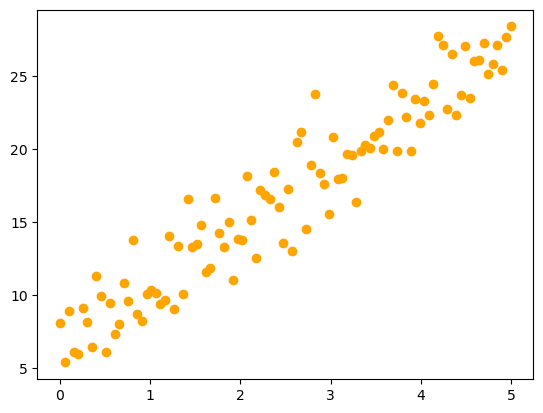

In [2]:
################################################ DO NOT EDIT ##################################################

noise = np.random.normal(0,2,100)
x = np.linspace(0,5, 100)
y_train = np.array(4*x+7) + noise
plt.plot(x,y_train,'o', color="orange")

Lets start with an initial weight. Normally, we would choose something that fits the trend of the graph somewhat. You could use the slope between the first and last points on the graph to do this and call it an initialization. In general, it is actually best to use However, for the purpose of demonstration, let's use a negative value for the weight, as this makes it a clearly wrong value. This will allow us to clearly demonstrate the improvement in performance of the algorithm.

We will also create a loss vector = here, we will add the loss for each point up after each set of iterations. Once that is done, we can use it to observe the improvement in performance.

In [ ]:
################################################ FINISH THIS SECTION ##################################################
'''PURPOSE: finish the function that can "model" a line. Essentially, what is the general equation for a line?
        Inputs: weight (w), x values (x), bias (b)
        Output: output (should be corresponding y values)
'''

def lin_func(w,x,b):
    output = [insert]
    return output

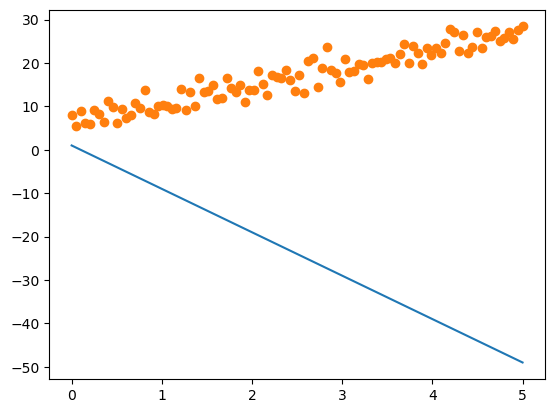

In [3]:
################################################ DO NOT EDIT ##################################################

weight_orig = -10
weight = weight_orig
y_pred = 10 * np.ones([3,100])
bias_orig = np.random.random(1)
bias = bias_orig

y_pred[0] = weight * x + bias
plt.plot(x,y_pred[0],x,y_train,'o')


loss = np.zeros(3)

Now, lets perform gradient descent. Now, because we are only considering what happens when we change w, and b is being fixed, our algorithm is very straightforward. for the gradient, we compute the derivative of the loss with respect to w and apply the chain rule. We will not go through the full computation - however, it is nice to be aware that the final value is quite intuitive. Another nice thing is that it is pretty much the inverse of what we did in the last notebook.

loss step for weight size: -183.95753284736284
loss step for bias size: -54.53550495549953
loss : 585.1622452135612


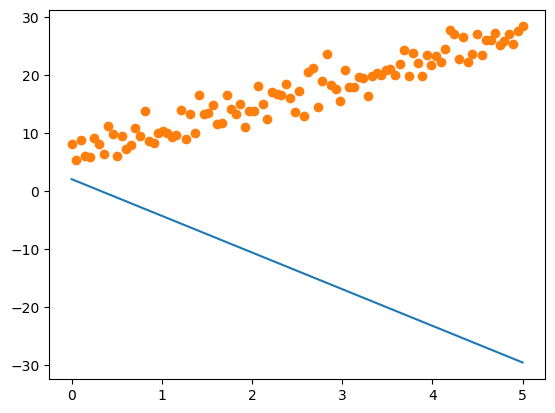

In [4]:
################################################ FINISH THIS SECTION ##################################################
'''Complete the rest of this function. '''


weight = weight_orig
bias = bias_orig
# gradient descent
loss_step_weight = np.sum((y_pred - y_train) * x) / 100
loss_step_bias = np.sum((y_pred - y_train)) / 100

print("loss step for weight size: %s" % loss_step_weight)
print("loss step for bias size: %s" % loss_step_bias)
learning_rate = 0.02
weight = weight - learning_rate * loss_step_weight
bias = bias - learning_rate * loss_step_bias

y_pred = weight * x + bias

loss[0] = 1/200 * np.sum((y_pred - y_train)**2)

plt.plot(x,y_pred,x,y_train,'o')

print("loss : %s" % loss[0])

Now, this process can be easily done iteratively, just as before. Let's see what happens when we perform gradient descent 7 times...

weight (w): -0.09466985764958236
bias (b): [4.06030222]


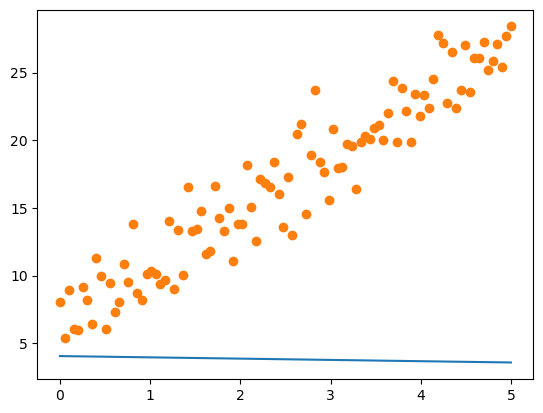

In [5]:
weight = weight_orig

bias = bias_orig
for i in range(1,7):
    loss_step_weight = np.sum((y_pred - y_train) * x) / 100
    loss_step_bias = np.sum((y_pred - y_train)) / 100
    learning_rate = 0.02
    weight = weight - learning_rate * loss_step_weight
    bias = bias - learning_rate * loss_step_bias
    y_pred = weight * x + bias



plt.plot(x,y_pred,x,y_train,'o')
print("weight (w): %s" % weight)
print("bias (b): %s" % bias)


10 times...

weight (w): 1.74165496203672
bias (b): [4.63965389]


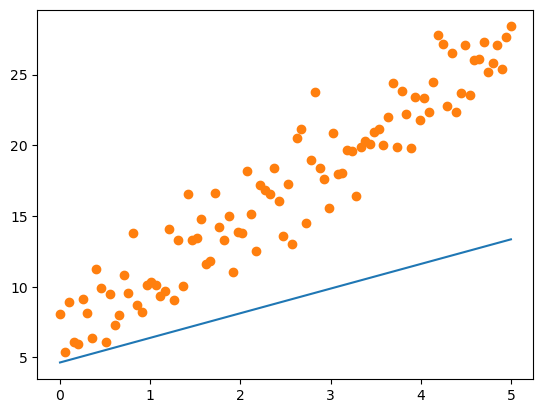

In [6]:
weight = weight_orig
bias = bias_orig
# gradient descent (5 iters)
for i in range(1,10):
    loss_step_weight = np.sum((y_pred - y_train) * x) / 100
    loss_step_bias = np.sum((y_pred - y_train)) / 100
    learning_rate = 0.02
    weight = weight - learning_rate * loss_step_weight
    bias = bias - learning_rate * loss_step_bias
    y_pred = weight * x + bias



plt.plot(x,y_pred,x,y_train,'o')
print("weight (w): %s" % weight)
print("bias (b): %s" % bias)


20 times...

weight (w): 3.1532364975483977
bias (b): [8.483524]


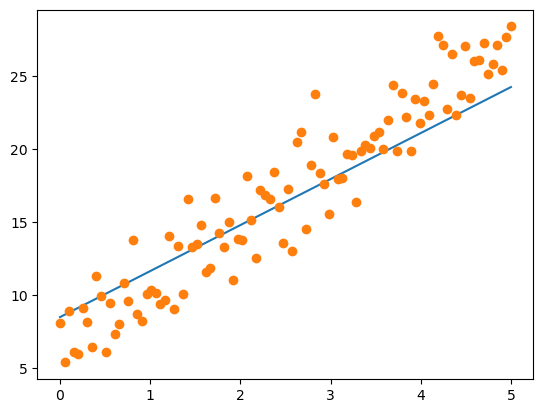

In [7]:
weight = weight_orig
# gradient descent (20 iters)
for i in range(1,20):
    loss_step_weight = np.sum((y_pred - y_train) * x) / 100
    loss_step_bias = np.sum((y_pred - y_train)) / 100
    learning_rate = 0.02
    weight = weight - learning_rate * loss_step_weight
    bias = bias - learning_rate * loss_step_bias
    y_pred = weight * x + bias



plt.plot(x,y_pred,x,y_train,'o')
print("weight (w): %s" % weight)
print("bias (b): %s" % bias)



200 times!

weight (w): 3.4313096548242776
bias (b): [8.79509128]


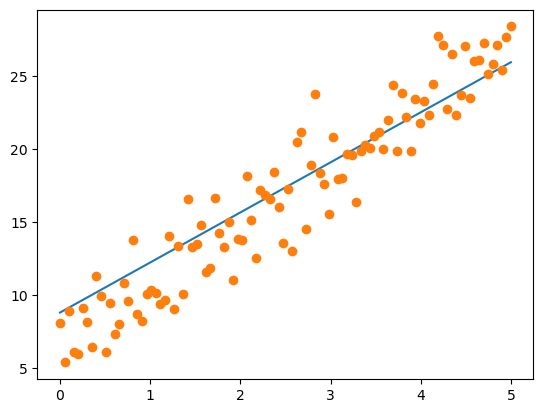

In [8]:
weight = weight_orig
# gradient descent (200 iters)
for i in range(1,200):
    loss_step_weight = np.sum((y_pred - y_train) * x) / 100
    loss_step_bias = np.sum((y_pred - y_train)) / 100
    learning_rate = 0.02
    weight = weight - learning_rate * loss_step_weight
    bias = bias - learning_rate * loss_step_bias
    y_pred = weight * x + bias



plt.plot(x,y_pred,x,y_train,'o')
print("weight (w): %s" % weight)
print("bias (b): %s" % bias)


Example: Predicting Blood Pressure Based on Lifestyle and Health Factors
Scenario: A healthcare clinic wants to better understand how various factors impact a patient’s blood pressure to help reduce hypertension rates. They decide to use linear regression to model the relationship between systolic blood pressure and a set of variables that represent lifestyle and health factors. The clinic has a dataset of anonymized patient records, including age, weight, physical activity level, dietary habits, and smoking status.

Objective: To create a predictive model that can estimate a patient’s systolic blood pressure using the collected factors. This will allow healthcare providers to identify high-risk patients more effectively and offer targeted advice to reduce their risk of hypertension.

The data collected is peoples age along with their corresponding systolic blood pressure. For example, one member who is age 35 has a systolic blood pressure of 100 mmHg.

Observe the improved performance! Clearly, our explorations from the last notebook fully apply in this context and situation. We ought to employ that reasoning in the same way here as well!



This is the full pipeline for Linear Regression. However, there are a couple of huge questions that this brings up...

One thing we will notice is that due to the noise, the results ended up getting skewed off course. Ideally, the value should be w = 4 and b = 7; however, due to randomized noise, this may not end up being the case. Obviously, the Gradient Descent algorithm is an optimizer that is not perfect. However, there are many optimizing algorithms out there - these all will lead to good solutions.

Actually, there is a great example of the last part - we can perform ths regression technique on a function that can actually perform binary classification. We will cover this in detail in the next notebook.
